In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import copy,math

In [6]:
from zipfile import ZipFile
file="C:\\Users\\HP\\OneDrive\\Desktop\\Jupyter\\Bharat Internship\\archive.zip"
with ZipFile(file,'r')as zip_ref:
    zip_ref.extractall()
    print("process completed")

process completed


In [7]:
house_data=pd.read_csv("data.csv")
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
X_features=['sqft_living','bedrooms','bathrooms','condition','yr_built']
X_train,y_train=np.array(house_data.loc[:,X_features]),house_data['price']
print(f"X_train = {X_train}\n Y_train={y_train}")

X_train = [[1.340e+03 3.000e+00 1.500e+00 3.000e+00 1.955e+03]
 [3.650e+03 5.000e+00 2.500e+00 5.000e+00 1.921e+03]
 [1.930e+03 3.000e+00 2.000e+00 4.000e+00 1.966e+03]
 ...
 [3.010e+03 3.000e+00 2.500e+00 3.000e+00 2.009e+03]
 [2.090e+03 4.000e+00 2.000e+00 3.000e+00 1.974e+03]
 [1.490e+03 3.000e+00 2.500e+00 4.000e+00 1.990e+03]]
 Y_train=0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


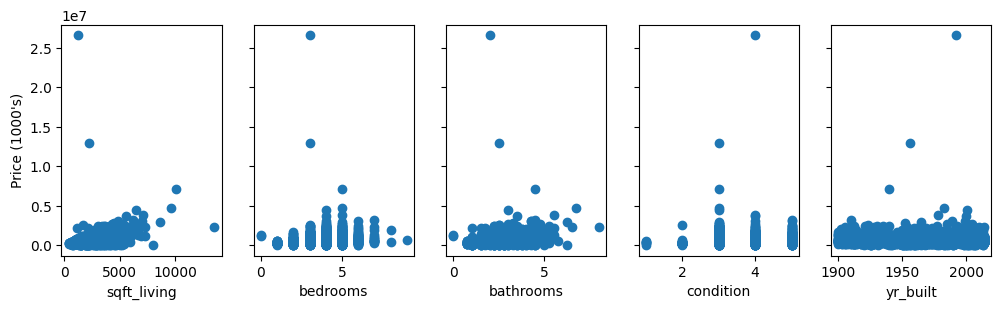

In [9]:
fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [10]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost+=(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [11]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros((n,))
    dj_db=0.0
    for i in range(m):
        err=(np.dot(X[i],w)+b-y[i])
        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        dj_db=dj_db+err
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [12]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(X,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        if i<100000:
            J_history.append(cost_function(X,y,w,b))   
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration : {i}  Cost  : {J_history[-1]:8.2f}")
    return w,b,J_history 

In [13]:
# initialize parameters
initial_w = [0.0,0.0,0.0,0.0,0.0]
initial_b = 0.
# some gradient descent settings
iterations = 300
alpha = 2.1e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration : 0  Cost  : 273444284576.24
Iteration : 30  Cost  : 129633944726.92
Iteration : 60  Cost  : 129489116534.90
Iteration : 90  Cost  : 129488868776.77
Iteration : 120  Cost  : 129488858939.07
Iteration : 150  Cost  : 129488849945.41
Iteration : 180  Cost  : 129488840956.16
Iteration : 210  Cost  : 129488831966.97
Iteration : 240  Cost  : 129488822977.85
Iteration : 270  Cost  : 129488813988.77
b,w found by gradient descent: 0.06,[ 2.53939697e+02 -1.53124536e+00  1.87342630e-01  1.68266548e+00
  3.96757958e+00] 


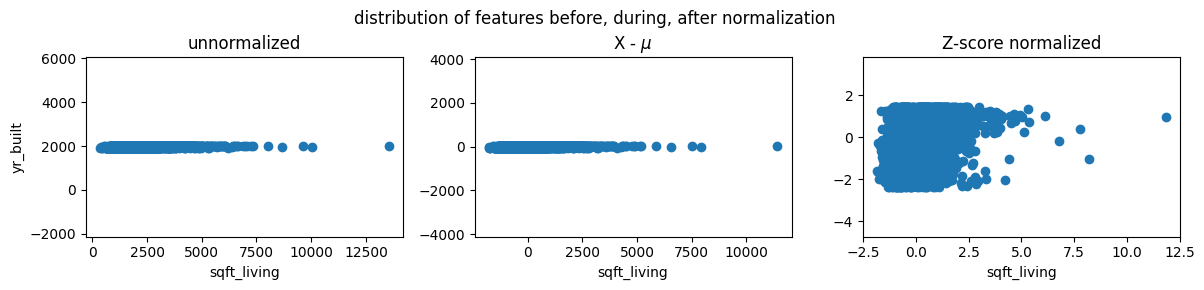

In [14]:
def z_score_normalize_features(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return (X_norm,mu,sigma)
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma       
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,4])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[4]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')
ax[1].scatter(X_mean[:,0], X_mean[:,4])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[4]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')
ax[2].scatter(X_norm[:,0], X_norm[:,4])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[4]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [15]:
# normalize the original features
X_norm, X_mu, X_sigma = z_score_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [2139.34695652    3.40086957    2.16081522    3.45173913 1970.78630435], 
X_sigma = [9.63102214e+02 9.08749322e-01 7.83695876e-01 6.77156152e-01
 2.97286165e+01]
Peak to Peak range by column in Raw        X:[1.317e+04 9.000e+00 8.000e+00 4.000e+00 1.140e+02]
Peak to Peak range by column in Normalized X:[13.67456103  9.90372128 10.20804146  5.90705702  3.83468905]


In [16]:
w_norm, b_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha=1.0e-1, num_iters=700)
print(f"b,w found by gradient descent: {b_norm:0.2f},{w_norm} ")

Iteration : 0  Cost  : 272851861911.02
Iteration : 70  Cost  : 126209935476.57
Iteration : 140  Cost  : 126131826953.51
Iteration : 210  Cost  : 126128943807.13
Iteration : 280  Cost  : 126128801478.49
Iteration : 350  Cost  : 126128794333.27
Iteration : 420  Cost  : 126128793974.26
Iteration : 490  Cost  : 126128793956.22
Iteration : 560  Cost  : 126128793955.32
Iteration : 630  Cost  : 126128793955.27
b,w found by gradient descent: 551962.99,[257048.16729603 -61781.38515709  58611.13146463  14798.14936192
 -74099.68472336] 


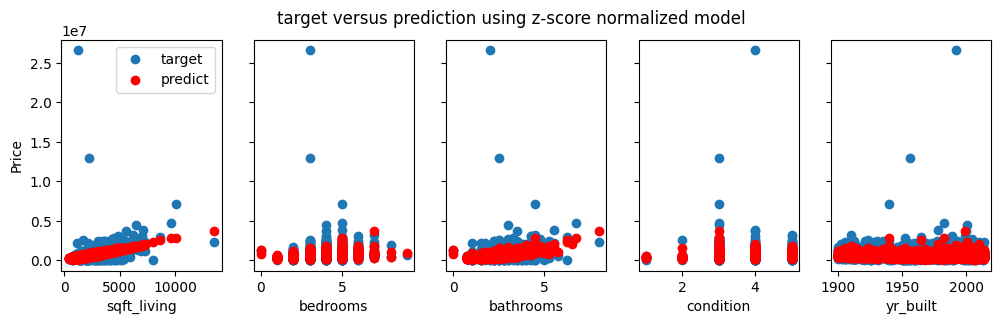

In [18]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,5,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [19]:
# First, normalize out example.
x_house = np.array([1940, 4, 2.50, 4, 1992])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 2940 sqft, 6 bedrooms, 3.5 Bathroom, 5 condition and 1995 year = ${x_house_predict*1000:0.0f}")

[-0.20698422  0.6592912   0.43280154  0.80965205  0.7135783 ]
 predicted price of a house with 2940 sqft, 6 bedrooms, 3.5 Bathroom, 5 condition and 1995 year = $442498564
